# EDA Análisis Exploratorio de Datos

Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación del conjunto de datos consolidado, procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

**Importamos Librerías**

In [2]:
# Cargamos librerias
# ==============================================================================
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Ingestar Datos**

In [3]:
# Cargamos el excel en un dataframe con la libreria Pandas
# ==============================================================================
homicidios = pd.read_csv('Data\homicidios_final.csv')
homicidios.head(3)

,ID,N_VICTIMAS,HORA_ACCIDENTE,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,FECHA_ACCIDENTE,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE,ANIO
0,2016-0001,1,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.47533969,-34.68757022,Moto-Auto,Auto,2016-01-01,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016
1,2016-0002,1,01:15:00,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.50877521,-34.66977709,Auto-Pasajeros,Pasajeros,2016-01-02,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016
2,2016-0003,1,07:00:00,Av Entre Rios 2034,Avenida,1,-58.39040293,-34.63189362,Moto-Auto,Auto,2016-01-03,Conductor,Moto,Masculino,30,2016-01-03 00:00:00,1,2016


**Exploración del Conjunto de Datos**

In [29]:
#Ahora vamos a ver la dimension del dataframe generado
# ==============================================================================
homicidios.shape

(690, 18)

In [30]:
#Ahora pasamos a ver cuales son los nombres de las columnas y los tipos de datos que tienen
# ==============================================================================
homicidios.dtypes

ID                     object
N_VICTIMAS              int64
HORA_ACCIDENTE         object
LUGAR_DEL_HECHO        object
TIPO_DE_CALLE          object
COMUNA                  int64
LONGITUD               object
LATITUD                object
PARTICIPANTES          object
ACUSADO                object
FECHA_ACCIDENTE        object
ROL                    object
VICTIMA                object
SEXO                   object
EDAD                    int64
FECHA_FALLECIMIENTO    object
SEMESTRE                int64
ANIO                    int64
dtype: object

In [31]:
#Pasamos a imprimir las primeras filas del conjunto de datos para obtener una vista previa
# ==============================================================================
print("Primeras filas del conjunto de datos:")
print(homicidios.head())

Primeras filas del conjunto de datos:
          ID  N_VICTIMAS HORA_ACCIDENTE  \
0  2016-0001           1       04:00:00   
1  2016-0002           1       01:15:00   
2  2016-0003           1       07:00:00   
3  2016-0005           1       05:20:00   
4  2016-0008           1       18:30:00   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  COMUNA  \
0  Av Piedra Buena Y Av Fernandez De La Cruz       Avenida       8   
1           Av Gral Paz Y Av De Los Corrales      Gral Paz       9   
2                         Av Entre Rios 2034       Avenida       1   
3   Av San Juan Y Presidente Luis Saenz Peña       Avenida       1   
4             Av 27 De Febrero Y Av Escalada       Avenida       8   

       LONGITUD       LATITUD     PARTICIPANTES      ACUSADO FECHA_ACCIDENTE  \
0  -58.47533969  -34.68757022         Moto-Auto         Auto      2016-01-01   
1  -58.50877521  -34.66977709    Auto-Pasajeros    Pasajeros      2016-01-02   
2  -58.39040293  -34.63189362         Moto

- Verificamos la presencia de valores nulos o faltantes en las columnas

In [32]:
print("\nInformación sobre valores nulos:")
print(homicidios.isnull().sum())


Información sobre valores nulos:
ID                     0
N_VICTIMAS             0
HORA_ACCIDENTE         0
LUGAR_DEL_HECHO        0
TIPO_DE_CALLE          0
COMUNA                 0
LONGITUD               0
LATITUD                0
PARTICIPANTES          0
ACUSADO                0
FECHA_ACCIDENTE        0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
SEMESTRE               0
ANIO                   0
dtype: int64


- Imprimimos estadísticas descriptivas para entender la distribución de los datos

In [33]:
print("\nEstadísticas descriptivas:")
print(homicidios.describe())


Estadísticas descriptivas:
       N_VICTIMAS      COMUNA        EDAD    SEMESTRE         ANIO
count  690.000000  690.000000  690.000000  690.000000   690.000000
mean     1.063768    7.402899   42.147826    1.515942  2018.223188
std      0.261719    4.400487   19.157317    0.500108     1.667424
min      1.000000    1.000000    1.000000    1.000000  2016.000000
25%      1.000000    4.000000   28.000000    1.000000  2017.000000
50%      1.000000    8.000000   39.000000    2.000000  2018.000000
75%      1.000000   11.000000   55.000000    2.000000  2020.000000
max      3.000000   15.000000   95.000000    2.000000  2021.000000


In [4]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   690 non-null    object
 1   N_VICTIMAS           690 non-null    int64 
 2   HORA_ACCIDENTE       690 non-null    object
 3   LUGAR_DEL_HECHO      690 non-null    object
 4   TIPO_DE_CALLE        690 non-null    object
 5   COMUNA               690 non-null    int64 
 6   LONGITUD             690 non-null    object
 7   LATITUD              690 non-null    object
 8   PARTICIPANTES        690 non-null    object
 9   ACUSADO              690 non-null    object
 10  FECHA_ACCIDENTE      690 non-null    object
 11  ROL                  690 non-null    object
 12  VICTIMA              690 non-null    object
 13  SEXO                 690 non-null    object
 14  EDAD                 690 non-null    int64 
 15  FECHA_FALLECIMIENTO  690 non-null    object
 16  SEMESTRE

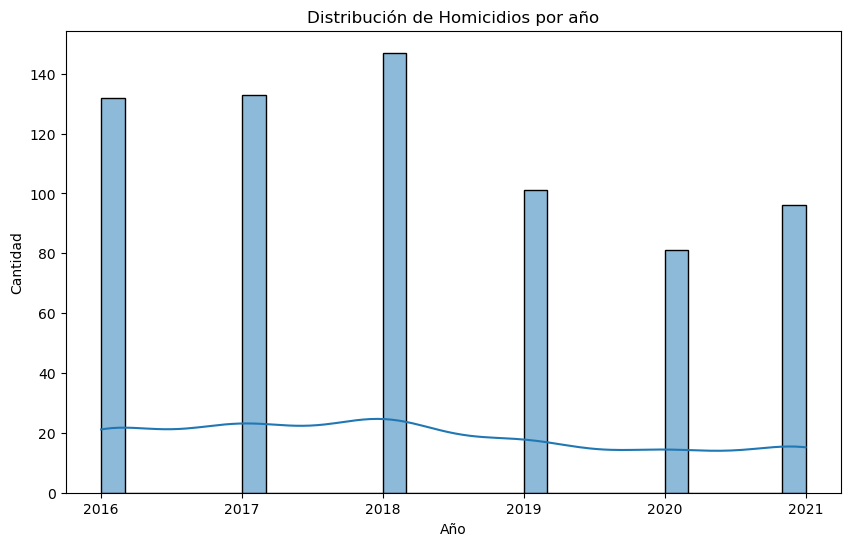

In [37]:
# Histograma con la distribución de homicidios por año
plt.figure(figsize=(10, 6))
sns.histplot(homicidios['ANIO'], bins=30, kde=True)
plt.title('Distribución de Homicidios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

**Lectura de los datos de accidentes viales en la Ciudad de Buenos Aires.**

Plot de variable categoricas

Se crean un gráficos de barras que muestra el tipo de calle, comuna, vehiculo acusado y numero de victimas en cada barra.

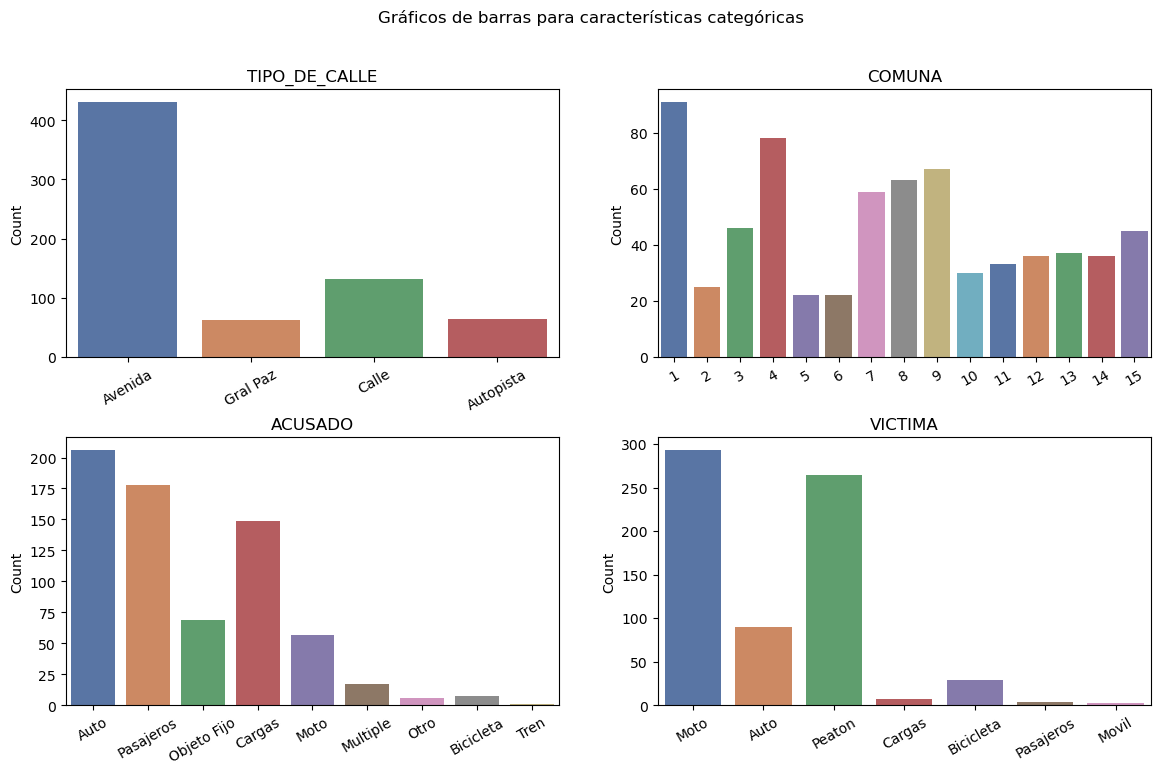

In [15]:
columnas_hom_categoricas = ["TIPO_DE_CALLE","COMUNA","ACUSADO","VICTIMA"]

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Gráficos de barras para características categóricas')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette=	'deep')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=30)
    
    # separa los plots
    plt.subplots_adjust(hspace=0.3)
    
    

# Plotting the bar plots
plot_bar_plots(homicidios,columnas_hom_categoricas)
plt.show()

**Num víctimas**

- Cantidad de víctimas fatales por siniestro vial

In [12]:
homicidios["N_VICTIMAS"].describe()

count    690.000000
mean       1.063768
std        0.261719
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

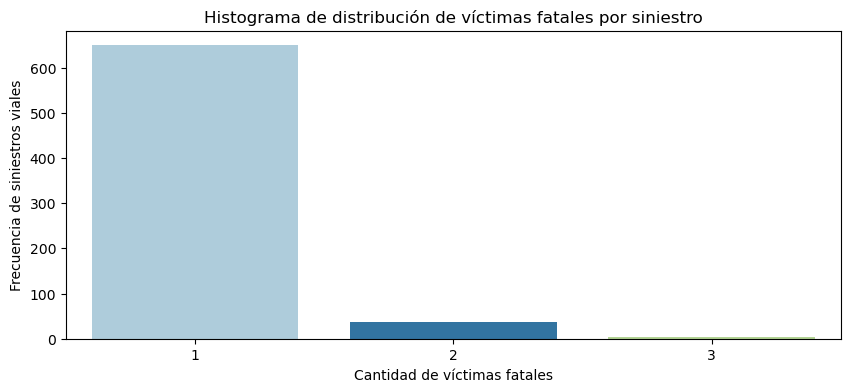

In [13]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = homicidios[homicidios["N_VICTIMAS"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

**Conclusión**

- La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la mayoría de los casos.
- Según los datos estadísticos de la columna el 75% de los siniestros viales tienen 1 víctima.
- Rara vez resulta un siniestro con tres víctimas fatales

**Edad de las víctimas**

Se crea un histograma de edades de las víctimas fatales y se utiliza el mismo eje para mostrar las estadísticas de la columna edades a través de un boxplot

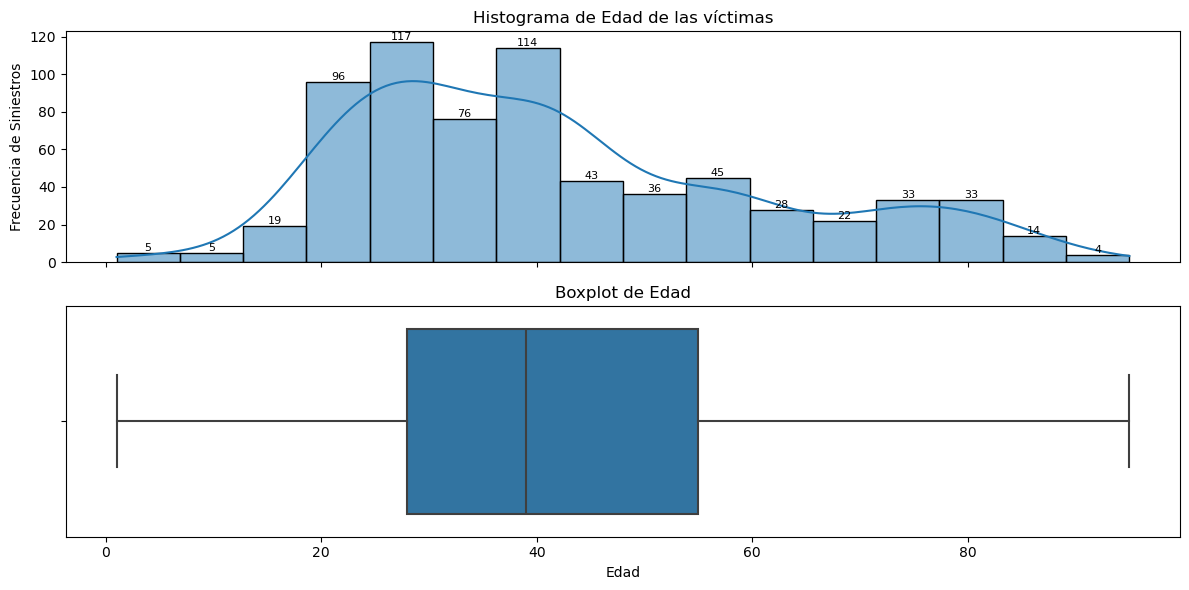

In [27]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(homicidios['EDAD'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=homicidios['EDAD'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

In [28]:
homicidios['EDAD'].describe()

count    690.000000
mean      42.147826
std       19.157317
min        1.000000
25%       28.000000
50%       39.000000
75%       55.000000
max       95.000000
Name: EDAD, dtype: float64

En una visualización en general se puede observar que el 75% de las víctimas fatales es menor que 55 años, la mediana es de 39 años. Con respecto a la distribución del histograma, puede concluirse que la mayor cantiad de víctimas fatales se concentra entre los 20 a 40 años de edad

**Distribución temporal de las Edades de las víctimas**

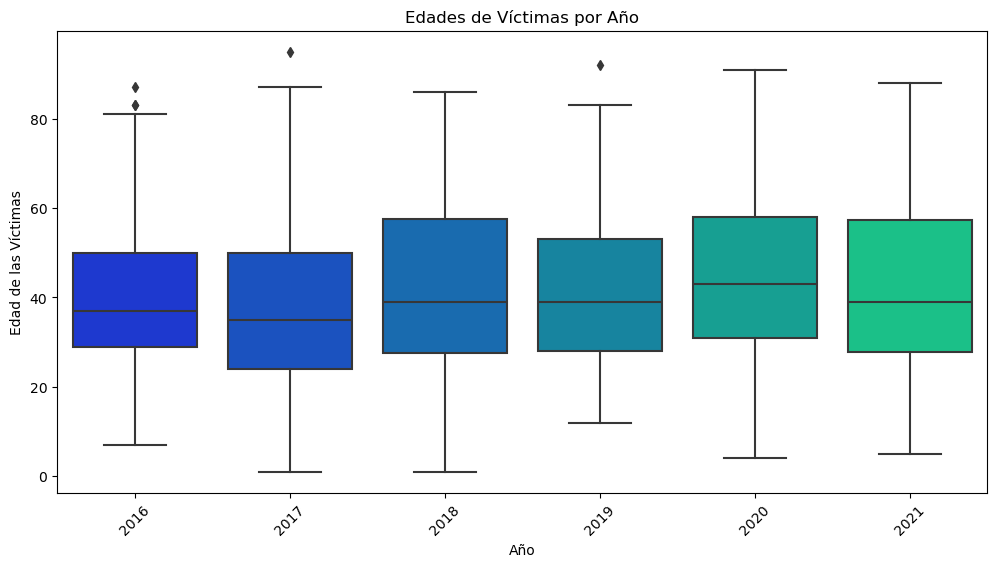

In [36]:
#Agrupa los datos en cantidad de victimas por edad y  año
data = homicidios.groupby(['EDAD', "ANIO"])['N_VICTIMAS'].sum().reset_index()


#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ANIO', y='EDAD', data=homicidios, palette="winter")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

**Conclusión**

El gráfico confirma que a través del tiempo, la mediana de la edad de las víctimas sigue siendo alrrededor de los 39 años y supera esta barrera en el año 2020

**Distribución de los Tipos de Calles donde suceden los siniestros**

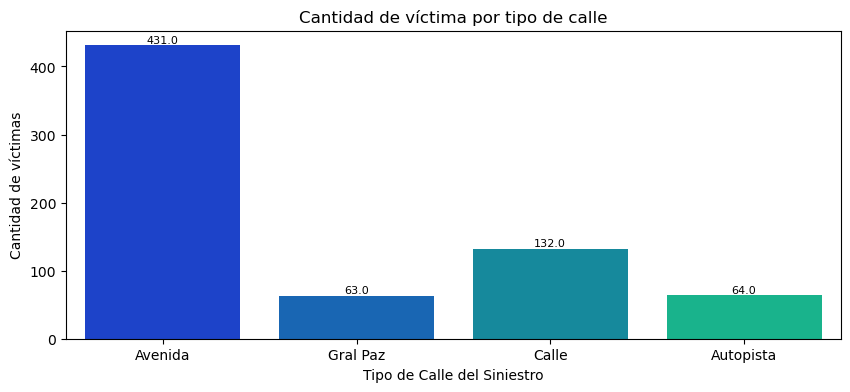

In [41]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(homicidios, x='TIPO_DE_CALLE', palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

**Conclusión**

Del análisis del gráfico resulta que el mayor número de víctimas fatales se producen en Avenida, secundado por calle.

**Distribución de Participantes en los Siniestros**

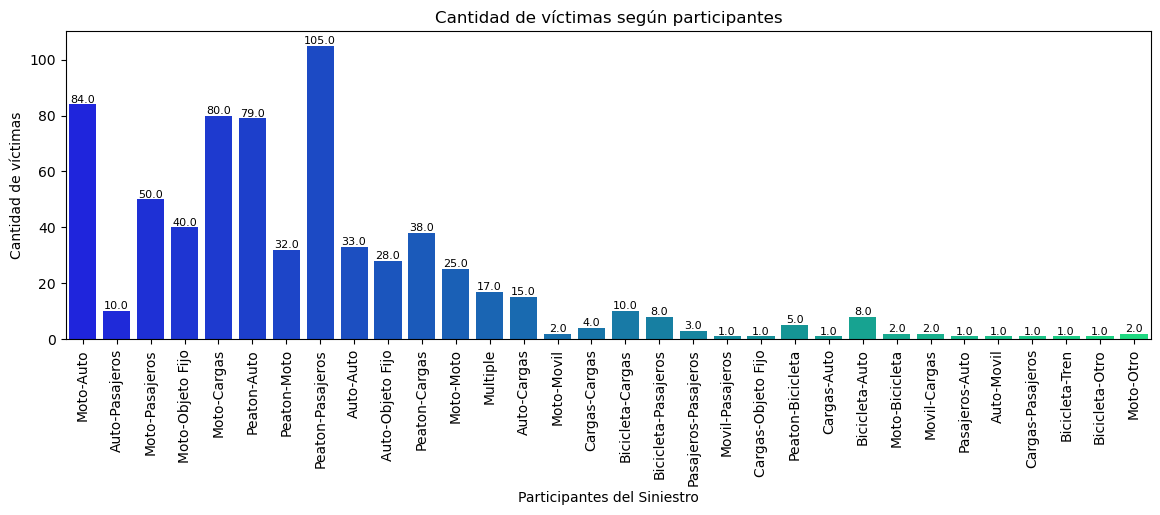

In [42]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(homicidios, x="PARTICIPANTES", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

**Conclusión**

- Los valores de participación que concentran más víctimas están en PEATON-PASAJEROS, esto según el diccionario de datos, se refiere a Peatón: es cualquier víctima distinta de cualquier ocupante de un vehículo; Pasajero: es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.

- Le siguen en importancia de víctimas MOTO-AUTO , PEATON-AUTO y MOTO-CARGAS

En la columna Participantes puede interpretarse que la primer palabra se relaciona a quien fue la Víctima y la segunda palabra se refiere al Acusado

**Distribución de Acusados en los siniestros**

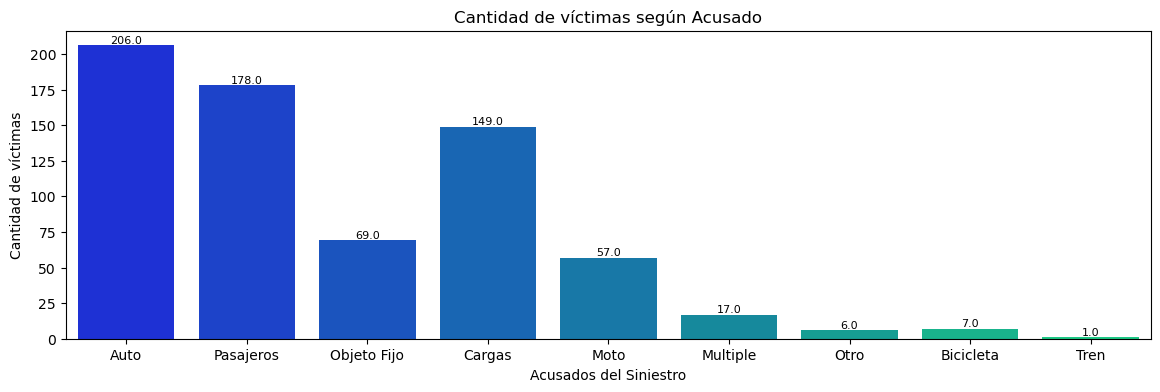

In [43]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(homicidios, x="ACUSADO", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

**Conclusión**

Se puede visualizar que los que causan más víctimas son los Autos, Cargas y Pasajeros. Esto se relaciona con el punto anterior.

**Distribución de Víctimas en los siniestros**

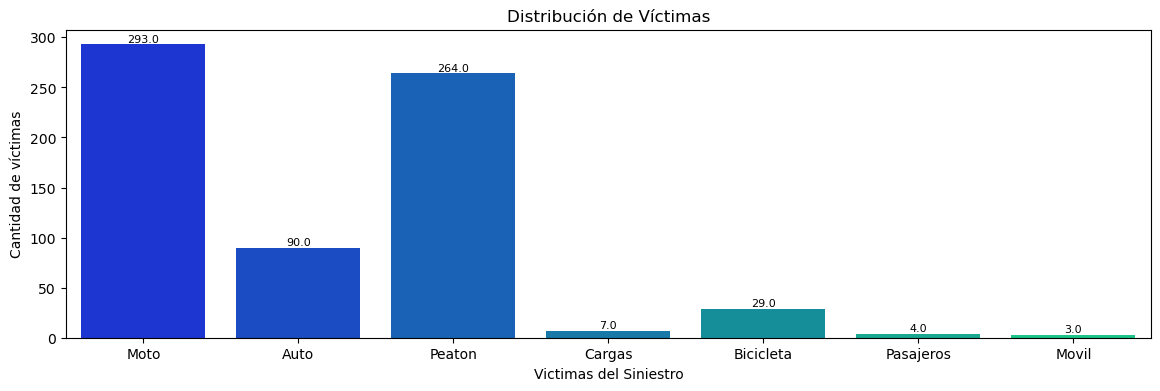

In [44]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(homicidios, x="VICTIMA", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

**Conclusión**

Se puede visualizar que las víctimas son Moto, Peaton y Carga. Esto se relaciona con ambos puntos anteriores.

**Matriz de confusión**

Se crea una tabla ce contingencia que relacione los datos de las columnas Víctima y Acusado para analizar de manera más visual los datos de los siniestros y sus participantes.

In [45]:
tabla_contingencia = pd.crosstab(homicidios['VICTIMA'], homicidios['ACUSADO'])

# Visualizar la tabla de contingencia
tabla_contingencia

ACUSADO,Auto,Bicicleta,Cargas,Moto,Multiple,Objeto Fijo,Otro,Pasajeros,Tren
VICTIMA,,,,,,,,,
Auto,33,0,15,0,3,28,1,10,0
Bicicleta,8,0,10,0,1,0,1,8,1
Cargas,1,0,4,0,0,1,0,1,0
Moto,84,2,80,25,8,40,4,50,0
Movil,0,0,2,0,0,0,0,1,0
Pasajeros,1,0,0,0,0,0,0,3,0
Peaton,79,5,38,32,5,0,0,105,0


**Conclusión**

Aquí se encuentran de manera más clara en sus resultados la intervención en cada siniestro.

- Cuando el acusado es Auto, la mayoría de las víctimas son Autos, Motos y Peatones.
- Cuando el acusado es Cargas, las victimas son variadas; siendo Motos y Peatones los más encontrados.
- Cuando el acusado es Pasajeros, las víctimas son principalmente Peatones y Motos.

La frecuencia de víctimas Motos y Peatones es alta, y se relacionan con casi todos los tipos de Acusados.

**Proporción de víctimas por Sexo**

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

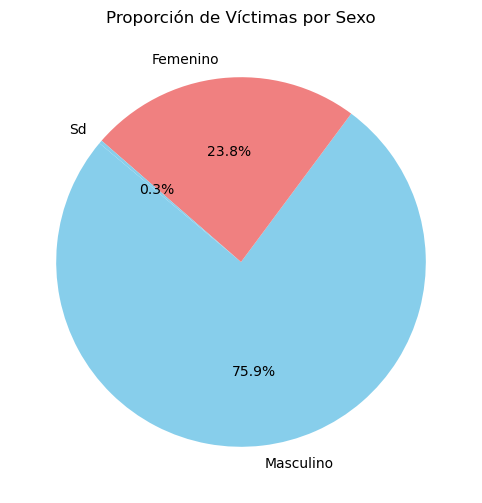

In [46]:
# Calcular la proporción de víctimas por sexo
proporcion = homicidios['SEXO'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

**Distribución de los roles de las víctimas por Sexo**

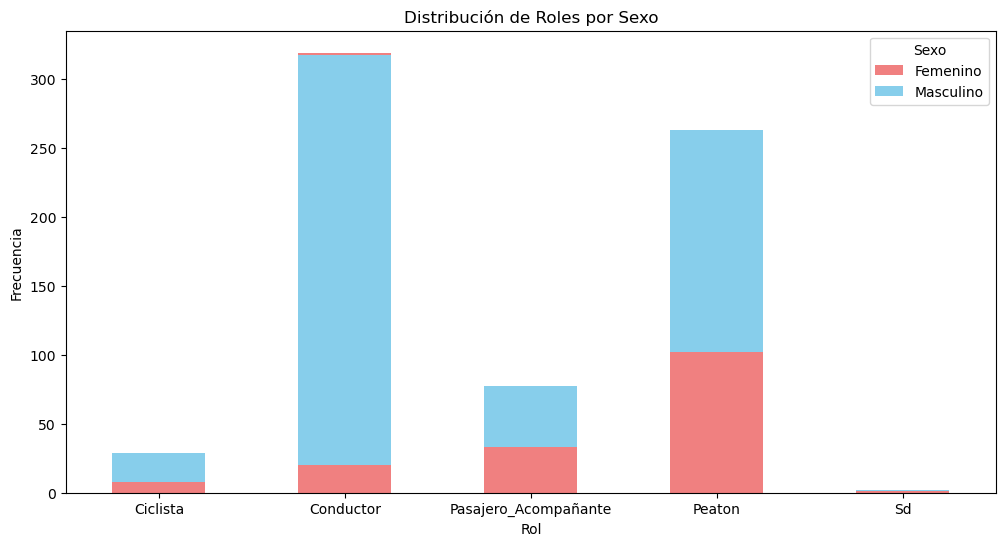

In [47]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(homicidios['ROL'], homicidios['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

**Conclusión**

La distribución por roles de las víctimas muestra que

la mayor cantidad de siniestros las victimas tienen como rol Conductor, seguida por Peatón.
para las víctimas de sexo Masculino, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
para las víctimas de sexo Femenino, el rol más frecuente en los siniestros es como peatón, seguido por pasajero-acompañante

**Distribucíon de víctimas según sexo y tipo de vehículo**

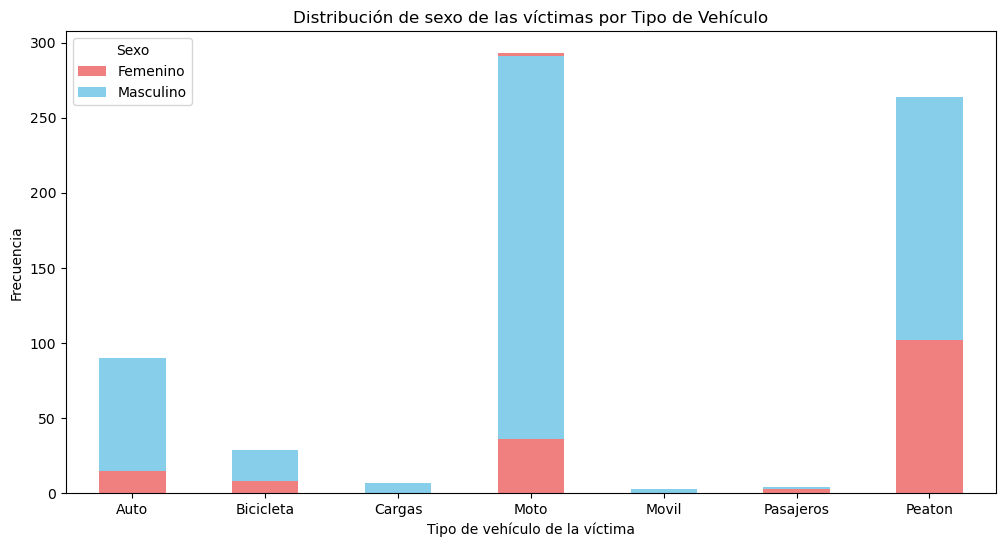

In [48]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(homicidios['VICTIMA'], homicidios['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

**Conclusión**

La mayor cantidad de accidentes con víctimas fatales son en Moto y además con más proporción de Masculinos
Los Peatones, son el segundo tipo de víctima, en el que la mayor proporción son Masculinos pero con menor diferencia que en la primera.

**Conclusión General**

El análisis de datos realizado comienza con una exploración inicial de los archivos para comprender su estructura y calidad, identificando el número de filas y columnas, el tipo de datos y la presencia de valores faltantes, nulos, duplicados y únicos. Después, se llevan a cabo acciones de limpieza de datos para corregir, imputar o eliminar valores inconsistentes, utilizando métodos como imputación por moda y reemplazo por cero. La limpieza se realiza para un análisis descriptivo para examinar las distribuciones y comportamientos de las variables utilizando estadísticas resumidas, visualizaciones gráficas y análisis correspondientes. 

En resumen, se trata de un proceso sistemático para preparar los datos para un análisis más detallado y comprensión de los mismos.





